In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
train=pd.read_csv(r'C:\Users\sonik\Downloads\titanic\train.csv')
test=pd.read_csv(r'C:\Users\sonik\Downloads\titanic\test.csv')

In [4]:
print('Train set shape:', train.shape)
print('Test set shape:', test.shape)
train.head()


Train set shape: (891, 12)
Test set shape: (418, 11)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
print('TRAIN SET MISSING VALUES:')
print(train.isna().sum())
print('')
print('TEST SET MISSING VALUES:')
print(test.isna().sum())

TRAIN SET MISSING VALUES:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

TEST SET MISSING VALUES:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [6]:
print(f'Duplicates in train set: {train.duplicated().sum()}, ({np.round(100*train.duplicated().sum()/len(train),1)}%)')
print('')
print(f'Duplicates in test set: {test.duplicated().sum()}, ({np.round(100*test.duplicated().sum()/len(test),1)}%)')

Duplicates in train set: 0, (0.0%)

Duplicates in test set: 0, (0.0%)


In [7]:
train.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [8]:
## continours = age, sibsp, parch, fare, 
## categorical = pclass, sex, embarked
## qualitative = passengerid, name, ticket, cabin
## target = survived

In [9]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

<AxesSubplot:ylabel='Survived'>

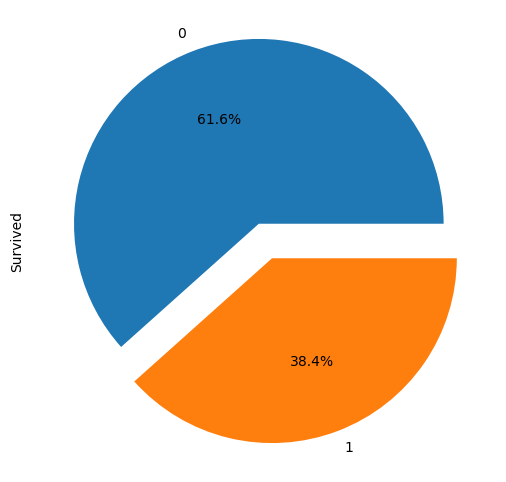

In [10]:
plt.figure(figsize=(6,6))
train['Survived'].value_counts().plot.pie(explode=[0.1,.1], autopct='%.1f%%')


In [11]:
## continous variables

<AxesSubplot:xlabel='Age', ylabel='Count'>

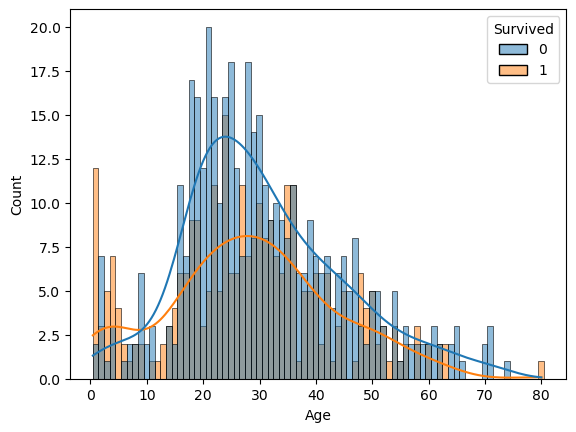

In [12]:
#age

sns.histplot(train, x= 'Age', hue='Survived', binwidth=1, kde=True )

In [13]:
## <= 9 yrs age= more likely to survive
##  10 and older = less likely to survive
## task1 = create 2 age gorups

<AxesSubplot:xlabel='Parch', ylabel='Count'>

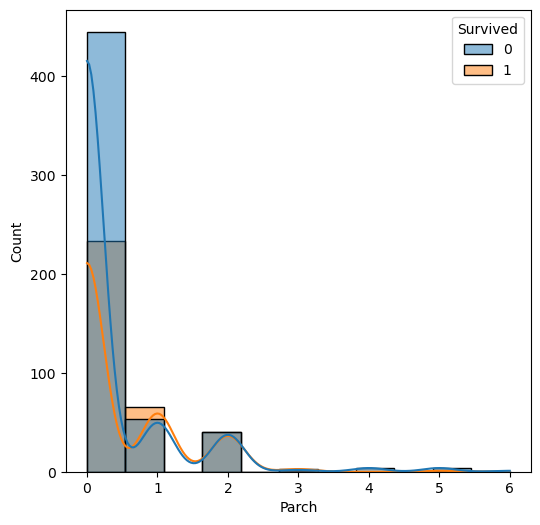

In [14]:
plt.figure(figsize=(6,6))

sns.histplot(train, x='Parch', hue='Survived', kde=True)


<AxesSubplot:xlabel='SibSp', ylabel='Count'>

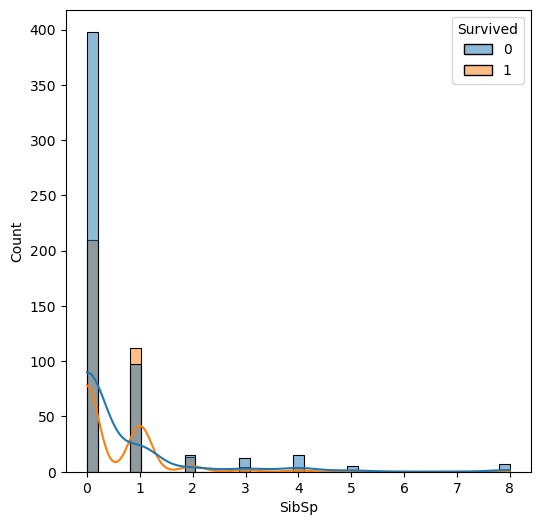

In [15]:
plt.figure(figsize=(6,6))

sns.histplot(train, x='SibSp', hue='Survived',  kde=True)



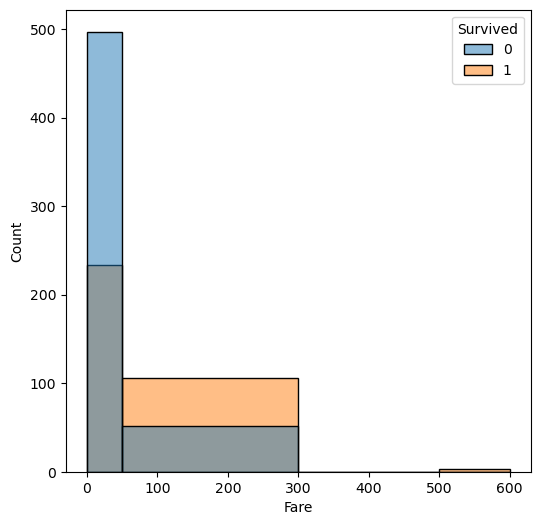

In [16]:
plt.figure(figsize=(6,6))

fig=sns.histplot(train, x='Fare', hue='Survived', bins=[0,50,300,500,600])
fig.set_ylim=(0,500)


In [17]:
##fare = 50 less likely, 51-150 more likely, 150 and above equal
##Parch = with 1 more likely, with all others less likely
##SibSp = with 1 more likely, with all others less likely

## fare regions
## Parch create 1 or not
## Sibsp create 1 or not


In [18]:
## Categorical variables


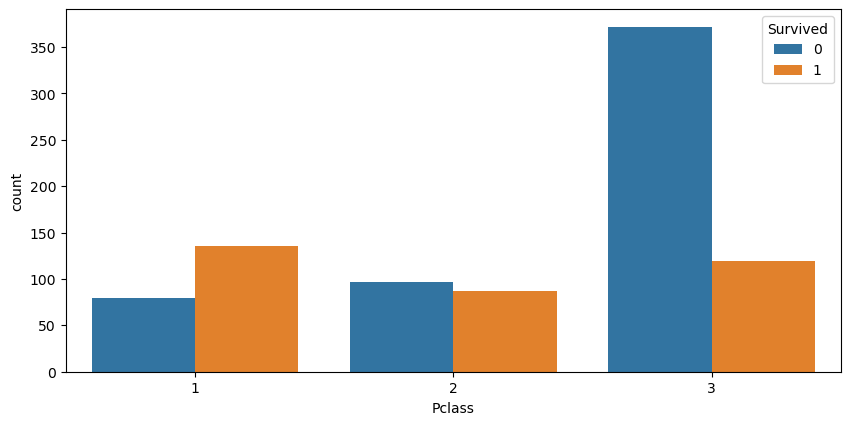

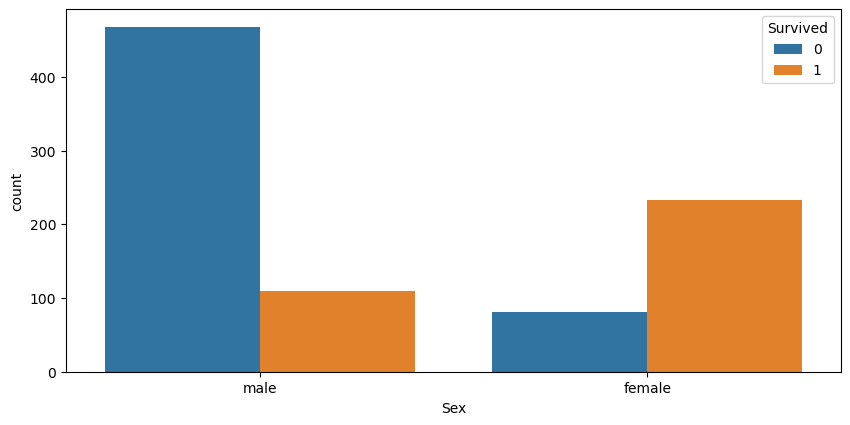

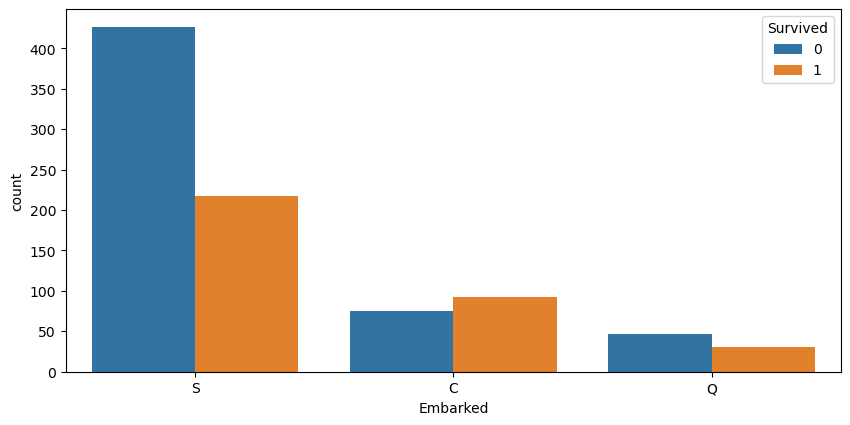

In [19]:
cat_features=['Pclass', 'Sex', 'Embarked']

for i,feature in enumerate(cat_features):
    plot=plt.figure(figsize=(10,16))
    ax=plot.add_subplot(3,1,i+1)
    sns.countplot(data=train, x= feature,  hue='Survived',axes=ax)
    ax.set_title= feature


<AxesSubplot:xlabel='Cabin', ylabel='Count'>

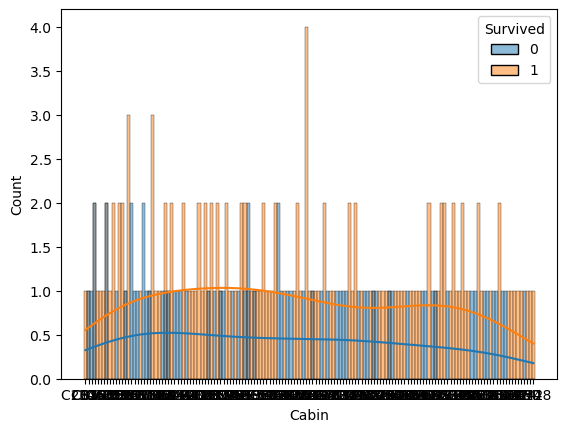

In [20]:
qual_feat=['PassengerId','Name','Ticket','Cabin']
sns.histplot(data=train, x='Cabin', hue='Survived', kde=True)

In [21]:
pip install -U pandasql

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [22]:
from pandasql import sqldf 

In [23]:

train['Cabin'].unique()


array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [24]:
import string

In [25]:
surnames=[]
data=train.copy()

for row in train['Name']:
    surname=row.split(',')[0]
    surnames.append(surname)
data['Surname']=surnames
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Surname'],
      dtype='object')

In [26]:
alphabets=list(string.ascii_uppercase)
grp=[]

for i,row in enumerate(data['Cabin']):
        if type(row)==float:
            grp.append('Unknown')
        elif type(row)==str:
            for alphabet in alphabets:
                if row[0]==alphabet:
                    grp.append(alphabet)
data['cabin_grp']=grp
        
            

In [27]:
### dealing with missing values
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Surname          0
cabin_grp        0
dtype: int64

<AxesSubplot:xlabel='cabin_grp', ylabel='Count'>

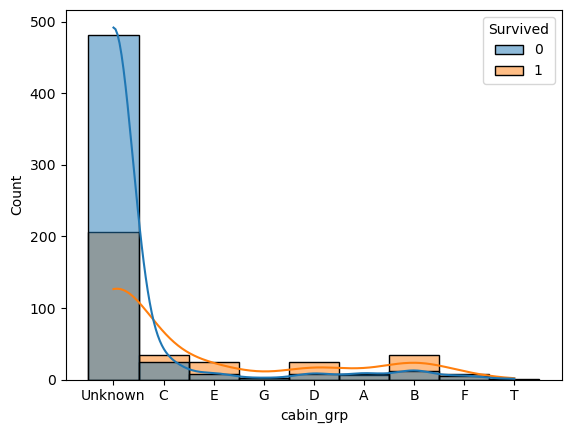

In [28]:
sns.histplot(data=data, x='cabin_grp', hue='Survived', kde=True)



In [29]:
data.groupby(by='cabin_grp')['cabin_grp','Survived'].mean()

C:\Users\sonik\AppData\Local\Temp\ipykernel_2072\3752026090.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby(by='cabin_grp')['cabin_grp','Survived'].mean()


,Survived
cabin_grp,
A,0.466667
B,0.744681
C,0.593220
D,0.757576
E,0.750000
F,0.615385
G,0.500000
T,0.000000
Unknown,0.299854


In [30]:
alphabets=list(string.ascii_uppercase)
grp1=[]
for i,row in enumerate(data['Cabin']):
        if type(row)==float:
            grp1.append(0)
        elif type(row)==str:
            grp1.append(1)
data['cabin_know']=grp1
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname,cabin_grp,cabin_know
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Unknown,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Unknown,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,C,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,Unknown,0


In [31]:
data.groupby(by='cabin_know')[['cabin_know','Survived']].mean()

,cabin_know,Survived
cabin_know,,
0,0.0,0.299854
1,1.0,0.666667


In [32]:

family=[]

for row in data.iterrows():
    family.append(row[1]['SibSp']+row[1]['Parch'])
data['family']=family
                              

<AxesSubplot:xlabel='Age', ylabel='Count'>

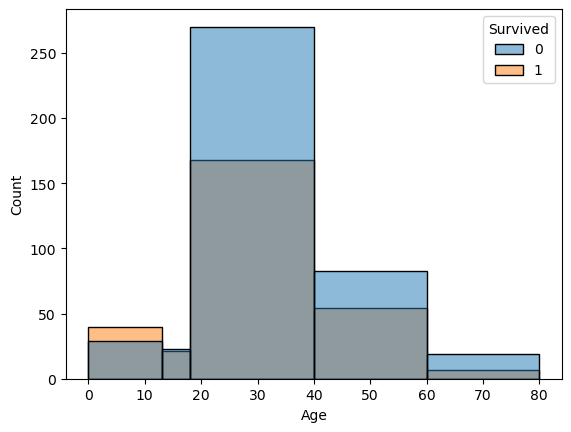

In [33]:
sns.histplot(data=data,x='Age', hue='Survived',bins=[0,13,18,40,60,80])

In [34]:
data['children']=(data['Age']<13).astype(int)   # one-hot encoding
data['adoloscents']=((data['Age']>=13) & (data['Age']<18)).astype(int)
data['Adults']=((data['Age']>=18) & (data['Age']<40)).astype(int)
data['MiddleAged']=((data['Age']>=40) & (data['Age']<60)).astype(int)
data['OldAdults']=((data['Age']>=60)).astype(int)


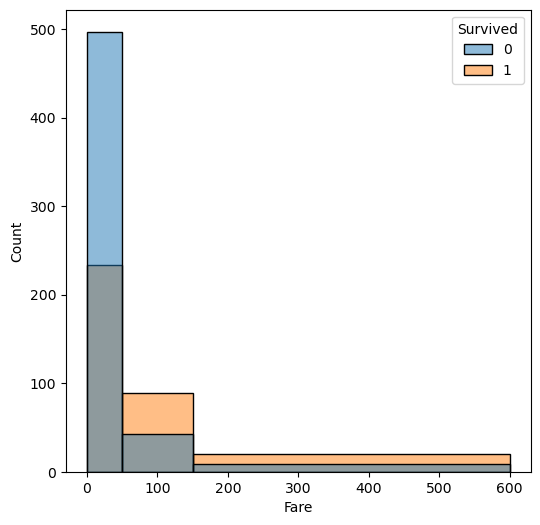

In [35]:
plt.figure(figsize=(6,6))

fig=sns.histplot(train, x='Fare', hue='Survived', bins=[0,50,150,600])
fig.set_ylim=(0,500)

In [36]:
data['lowfare']=(data['Fare']<50).astype(int)   # one-hot encoding
data['midfare']=((data['Fare']>=50) & (data['Age']<150)).astype(int)
data['highfare']=(data['Fare']>=150).astype(int)

In [37]:
data.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Surname', 'cabin_grp',
       'cabin_know', 'family', 'children', 'adoloscents', 'Adults',
       'MiddleAged', 'OldAdults', 'lowfare', 'midfare', 'highfare'],
      dtype='object')

In [38]:
# fill embarked na values with mode, here S
data['Embarked'].fillna('S', inplace=True)
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Surname          0
cabin_grp        0
cabin_know       0
family           0
children         0
adoloscents      0
Adults           0
MiddleAged       0
OldAdults        0
lowfare          0
midfare          0
highfare         0
dtype: int64

In [39]:
asep_age= data.groupby(by=['Embarked','Sex','Pclass'])[['Age']].median()

asep_age

Age
Embarked Sex    Pclass       
C        female 1       37.00
                2       22.00
                3       14.25
         male   1       36.50
                2       29.50
                3       26.00
Q        female 1       33.00
                2       30.00
                3       20.00
         male   1       44.00
                2       57.00
                3       27.00
S        female 1       34.00
                2       29.00
                3       23.00
         male   1       42.00
                2       30.00
                3       25.00

In [40]:
## there seeems to be a pattern for age, male age is higher than female always
## the avg age seems to increase as Pclass becomes higher(1) except for for male person sitting in Pclass 2 from Q dock
## avg age for C>S>Q but if we go into sex and pclass then it bcomes complicated 
## if we find mean of ages based on all 3 qualitative factors then it might lead to overfitting
## let us try it 

In [41]:

age_na_rows=data.loc[data['Age'].isna(),'Age'].index

for row in data.loc[age_na_rows,['Age','Embarked','Sex','Pclass']].iterrows():
    dock=row[1]['Embarked']
    sex=row[1]['Sex']
    pclass=row[1]['Pclass']
    data.loc[age_na_rows,'Age']=asep_age.loc[(dock,sex,pclass),'Age']
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Surname          0
cabin_grp        0
cabin_know       0
family           0
children         0
adoloscents      0
Adults           0
MiddleAged       0
OldAdults        0
lowfare          0
midfare          0
highfare         0
dtype: int64

In [42]:
#update agegrps after filling missing values for age
data['children']=(data['Age']<13).astype(int)   # one-hot encoding
data['adoloscents']=((data['Age']>=13) & (data['Age']<18)).astype(int)
data['Adults']=((data['Age']>=18) & (data['Age']<40)).astype(int)
data['MiddleAged']=((data['Age']>=40) & (data['Age']<60)).astype(int)
data['OldAdults']=((data['Age']>=60)).astype(int)


In [43]:
# insert missing values for test data

In [44]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [45]:
test.loc[test[['Fare']].isnull().any(axis=1)]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [46]:
avg_fare=data.groupby(by=['Embarked','Sex','Pclass'])[['Fare']].mean()
test.loc[(test[['Fare']].isnull().any(axis=1)),'Fare'] = avg_fare.loc[('S','male',3),:][0]

In [47]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [48]:
test_asep_age= test.groupby(by=['Embarked','Sex','Pclass'])[['Age']].median()

test_age_na_rows=test.loc[test['Age'].isna(),'Age'].index

for row in test.loc[test_age_na_rows,['Age','Embarked','Sex','Pclass']].iterrows():
    dock=row[1]['Embarked']
    sex=row[1]['Sex']
    pclass=row[1]['Pclass']
    test.loc[test_age_na_rows,'Age']=test_asep_age.loc[(dock,sex,pclass),'Age']
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [49]:
test['children']=(test['Age']<13).astype(int)   # one-hot encoding
test['adoloscents']=((test['Age']>=13) & (test['Age']<18)).astype(int)
test['Adults']=((test['Age']>=18) & (test['Age']<40)).astype(int)
test['MiddleAged']=((test['Age']>=40) & (test['Age']<60)).astype(int)
test['OldAdults']=((test['Age']>=60)).astype(int)

In [50]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
children         0
adoloscents      0
Adults           0
MiddleAged       0
OldAdults        0
dtype: int64

In [51]:
grp1=[]
for i,row in enumerate(test['Cabin']):
        if type(row)==float:
            grp1.append(0)
        elif type(row)==str:
            grp1.append(1)
test['cabin_know']=grp1
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
children         0
adoloscents      0
Adults           0
MiddleAged       0
OldAdults        0
cabin_know       0
dtype: int64

In [52]:
test['lowfare']=(test['Fare']<50).astype(int)   # one-hot encoding
test['midfare']=((test['Fare']>=50) & (test['Age']<150)).astype(int)
test['highfare']=(test['Fare']>=150).astype(int)

In [53]:
family=[]

for row in test.iterrows():
    family.append(row[1]['SibSp']+row[1]['Parch'])
test['family']=family
                       

In [54]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'children', 'adoloscents',
       'Adults', 'MiddleAged', 'OldAdults', 'cabin_know', 'lowfare', 'midfare',
       'highfare', 'family'],
      dtype='object')

In [55]:
## ready our train and test data

In [56]:
X=data.copy()
X_test=test.copy()

In [57]:
#lets frop sibsp and parch for now
X.drop(columns=['PassengerId', 'Survived', 'Name', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Surname', 'cabin_grp'], inplace=True)


In [58]:
X.columns

Index(['Pclass', 'Sex', 'Embarked', 'cabin_know', 'family', 'children',
       'adoloscents', 'Adults', 'MiddleAged', 'OldAdults', 'lowfare',
       'midfare', 'highfare'],
      dtype='object')

In [59]:
X_test.drop(columns=['PassengerId', 'Name', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin'], inplace=True)

In [60]:
X_test.columns

Index(['Pclass', 'Sex', 'Embarked', 'children', 'adoloscents', 'Adults',
       'MiddleAged', 'OldAdults', 'cabin_know', 'lowfare', 'midfare',
       'highfare', 'family'],
      dtype='object')

In [61]:
X.dtypes

Pclass          int64
Sex            object
Embarked       object
cabin_know      int64
family          int64
children        int32
adoloscents     int32
Adults          int32
MiddleAged      int32
OldAdults       int32
lowfare         int32
midfare         int32
highfare        int32
dtype: object

In [62]:

X['Pclass']=X['Pclass'].astype(str)
X=pd.get_dummies(X)


In [63]:
X=X.astype('float64')
X.dtypes

cabin_know     float64
family         float64
children       float64
adoloscents    float64
Adults         float64
MiddleAged     float64
OldAdults      float64
lowfare        float64
midfare        float64
highfare       float64
Pclass_1       float64
Pclass_2       float64
Pclass_3       float64
Sex_female     float64
Sex_male       float64
Embarked_C     float64
Embarked_Q     float64
Embarked_S     float64
dtype: object

In [64]:

X_test['Pclass']=X_test['Pclass'].astype(str)
X_test=pd.get_dummies(X_test)
X_test=X_test.astype('float64')
X_test.dtypes


children       float64
adoloscents    float64
Adults         float64
MiddleAged     float64
OldAdults      float64
cabin_know     float64
lowfare        float64
midfare        float64
highfare       float64
family         float64
Pclass_1       float64
Pclass_2       float64
Pclass_3       float64
Sex_female     float64
Sex_male       float64
Embarked_C     float64
Embarked_Q     float64
Embarked_S     float64
dtype: object

In [65]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV,StratifiedKFold
from sklearn.metrics import r2_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import time

In [66]:
classifiers = {
    "LogisticRegression" : LogisticRegression(random_state=0),
    "KNN" : KNeighborsClassifier(),
    "SVC" : SVC(random_state=0, probability=True),
    "DecisionTreeClassifier" : DecisionTreeClassifier(random_state=0),
    
}
LR_grid = {'penalty': ['l1','l2'],
           'C': [0.25, 0.5, 0.75, 1, 1.25, 1.5],
           'max_iter': [50, 100, 150]}

KNN_grid = {'n_neighbors': [3, 5, 7, 9],
            'p': [1, 2]}

SVC_grid = {'C': [0.25, 0.5, 0.75, 1, 1.25, 1.5],
            'kernel': ['linear', 'rbf'],
            'gamma': ['scale', 'auto']}

Tree_grid = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}
grid = {
    "LogisticRegression" : LR_grid,
    "KNN" : KNN_grid,
    "SVC" : SVC_grid,
    "DecisionTreeClassifier" : Tree_grid,
}

In [67]:
Y=data.copy()
Y=Y['Survived']
Y.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [68]:
X_train, X_valid, Y_train, Y_valid = train_test_split(X,Y,stratify=Y,train_size=0.8,test_size=0.2,random_state=0)

In [69]:
i=0
clf_best_params=classifiers.copy()
valid_scores=pd.DataFrame({'Classifer':classifiers.keys(), 'Validation accuracy': np.zeros(len(classifiers)), 'Training time': np.zeros(len(classifiers))})
for key, classifier in classifiers.items():
    start = time.time()
    clf = GridSearchCV(estimator=classifier, param_grid=grid[key], n_jobs=-1, cv=None)

    # Train and score
    clf.fit(X_train, Y_train)
    valid_scores.iloc[i,1]=clf.score(X_valid,Y_valid)

    # Save trained model
    clf_best_params[key]=clf.best_params_
    
    # Print iteration and training time
    stop = time.time()
    valid_scores.iloc[i,2]=np.round((stop - start)/60, 2)
    
    print('Model:', key)
    print('Training time (mins):', valid_scores.iloc[i,2])
    print('')
    i+=1

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
90 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
Val

Model: LogisticRegression
Training time (mins): 0.18



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Model: KNN
Training time (mins): 0.01

Model: SVC
Training time (mins): 0.05

Model: DecisionTreeClassifier
Training time (mins): 0.1



In [70]:
valid_scores

,Classifer,Validation accuracy,Training time
0,LogisticRegression,0.776536,0.18
1,KNN,0.776536,0.01
2,SVC,0.810056,0.05
3,DecisionTreeClassifier,0.804469,0.10


In [71]:
clf_best_params

{'LogisticRegression': {'C': 1.5, 'max_iter': 50, 'penalty': 'l2'},
 'KNN': {'n_neighbors': 3, 'p': 2},
 'SVC': {'C': 0.75, 'gamma': 'scale', 'kernel': 'rbf'},
 'DecisionTreeClassifier': {'criterion': 'entropy',
  'max_depth': 8,
  'max_features': 'auto',
  'min_samples_leaf': 1,
  'min_samples_split': 5,
  'splitter': 'best'}}

In [72]:
best_classifiers = {
    "SVC" : SVC(**clf_best_params["SVC"],random_state=0, probability=True),
    "DecisionTreeClassifier" : DecisionTreeClassifier(**clf_best_params["DecisionTreeClassifier"], random_state=0)
}

In [73]:
svm=best_classifiers['SVC']
svm_parameters={'C': [0.75], 'gamma': ['scale'], 'kernel': ['rbf']}
svm_cv=GridSearchCV(svm,svm_parameters,  cv=10)
svm_cv.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=SVC(C=0.75, probability=True, random_state=0),
             param_grid={'C': [0.75], 'gamma': ['scale'], 'kernel': ['rbf']})

In [74]:
svm_cv.score(X_train,Y_train)

0.8384831460674157

In [75]:
svm_preds=svm_cv.predict(X_valid)

In [76]:
svm_cv.score(X_valid,Y_valid)

0.8100558659217877

In [77]:
r2_score(Y_valid, svm_preds)

0.19815546772068515

In [78]:
tree_params = {'criterion': ['entropy'],
  'max_depth': [8],
  'max_features': ['auto'],
  'min_samples_leaf': [1],
  'min_samples_split': [5],
  'splitter': ['best']}
tree=DecisionTreeClassifier(random_state=0)
tree_cv=GridSearchCV(tree,tree_params,  cv=10)
tree_cv.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['entropy'], 'max_depth': [8],
                         'max_features': ['auto'], 'min_samples_leaf': [1],
                         'min_samples_split': [5], 'splitter': ['best']})

In [79]:
tree_cv.score(X_train,Y_train)

0.8609550561797753

In [80]:
tree_cv.score(X_valid,Y_valid)

0.8044692737430168

In [81]:
tree_preds=tree_cv.predict(X_valid)

In [82]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_valid,tree_preds)

array([[100,  10],
       [ 25,  44]], dtype=int64)

In [83]:
confusion_matrix(Y_valid,svm_preds)

array([[97, 13],
       [21, 48]], dtype=int64)

In [84]:
X.columns


Index(['cabin_know', 'family', 'children', 'adoloscents', 'Adults',
       'MiddleAged', 'OldAdults', 'lowfare', 'midfare', 'highfare', 'Pclass_1',
       'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male', 'Embarked_C',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [85]:
X_test=X_test.loc[:,['cabin_know', 'family', 'children', 'adoloscents', 'Adults',
       'MiddleAged', 'OldAdults', 'lowfare', 'midfare', 'highfare', 'Pclass_1',
       'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male', 'Embarked_C',
       'Embarked_Q', 'Embarked_S']]

In [86]:
tree_pred_sub=test[['PassengerId']]
survived_df=pd.DataFrame({'Survived': list(tree_cv.predict(X_test))})

In [87]:
tree_sub=tree_pred_sub.join(survived_df)

In [88]:
tree_sub

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [89]:
svm_pred_sub=test[['PassengerId']]
survived_df=pd.DataFrame({'Survived': list(svm_cv.predict(X_test))})
svm_sub=svm_pred_sub.join(survived_df)
svm_sub

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [90]:
abc=tree_sub.loc[:,'Survived']==svm_sub.loc[:,'Survived']
abc.value_counts()

True     374
False     44
Name: Survived, dtype: int64

In [92]:
sub=tree_sub['PassengerId']

In [93]:
tree_sub.to_csv(r'C:\Users\sonik\Downloads\titanic\treesub.csv', index=False)

In [94]:
svm_sub.to_csv(r'C:\Users\sonik\Downloads\titanic\svmsub.csv', index=False)